In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading dataset
dataset=load_dataset("lukebarousse/data_jobs")

df=dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

df['job_skills']=df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if isinstance(skills, str) & pd.notna(skills) else skills)


In [54]:
country='United States'
job='Data Analyst'
df_job_country=df[(df['job_country']==country)& (df['job_title_short']==job)]
df_exploded=df_job_country.explode('job_skills')
df_grouped=df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_top_pay=df_grouped.sort_values(by='median',ascending=False).head(10)
df_top_skill=df_grouped.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
# counts the most demand skill then sorts by median salary

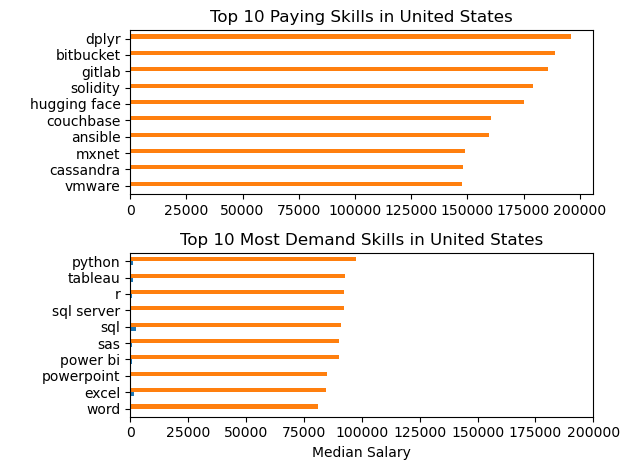

In [65]:
fig,ax=plt.subplots(2,1)
df_top_pay[::-1].plot(kind='barh',ax=ax[0],legend=False,)
ax[0].set_title(f'Top 10 Paying Skills in {country}')
df_top_skill[::-1].head(10).plot(kind='barh',ax=ax[1],legend=False)
ax[1].set_title(f'Top 10 Most Demand Skills in {country}')
ax[1].set_xlabel('Median Salary')
ax[0].set_ylabel(" ")
ax[1].set_ylabel(" ")
ax[1].set_xlim(0,200000)
fig.tight_layout()
